
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [12]:

import numpy as np
import matplotlib.pyplot as plt


In [13]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def __init__(self):
        self.mean=None
        self.std=None
    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        self.std=np.std(X,axis=0)
        self.std[self.std==0]=1   #Avoiding division by 0
        return self
    def transform(self, X):
        assert self.mean is not None, "Fit the scaler first"
        assert self.std is not None, "Fit the scaler first"
        X = np.array(X)
        return (X-self.mean)/self.std
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [16]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []
    def fit(self, X, y):
        n=self.epochs
        self.weights = np.ones(X.shape[1],dtype=float)
        self.bias = 0
        b=self.bias
        w=self.weights
        l=self.l2_lambda
        for i in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            mse_loss = np.mean((y_pred - y) ** 2)
            l2_loss = l * np.sum(self.weights ** 2)
            self.loss_history.append(mse_loss + l2_loss)
            dw = (2 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            dw += 2 * self.l2_lambda * self.weights
            db = (2 / X.shape[0]) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            return self.weights,self.bias
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Final Weights: [1.62366069]
Final Bias: 6.820004100101897


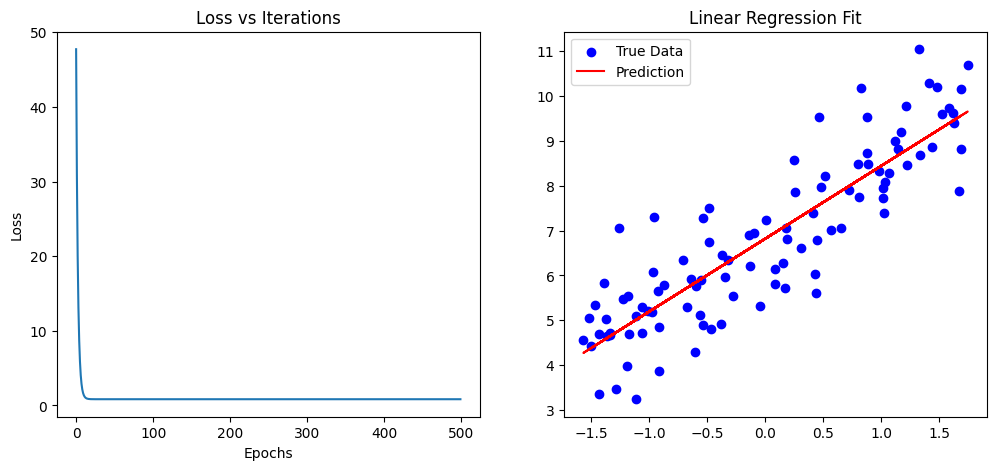

In [18]:
np.random.seed(42)
X_dummy = 2 * np.random.rand(100, 1)
y_dummy = 4 + 3 * X_dummy.flatten() + np.random.randn(100)
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_dummy)
lr_model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.01)
lr_model.fit(X_scaled, y_dummy)
w_final,b_final=lr_model.weights,lr_model.bias
print("Final Weights:", w_final)
print("Final Bias:", b_final)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lr_model.loss_history)
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.scatter(X_scaled, y_dummy, color='blue', label='True Data')
plt.plot(X_scaled, lr_model.predict(X_scaled), color='red', label='Prediction')
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [28]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
   return 1/(1+np.exp(-z))


In [29]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []
    def fit(self, X, y):
        self.weights = np.ones(X.shape[1],dtype=float)
        self.bias = 0
        for i in range(self.epochs):
            y_pred = sigmoid(np.dot(X, self.weights) + self.bias)
            epsilon = 1e-15
            bce_loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
            l2_loss = self.l2_lambda * np.sum(self.weights ** 2)
            self.loss_history.append(bce_loss + l2_loss)
            dw = (2 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            dw += 2 * self.l2_lambda * self.weights
            db = (2 / X.shape[0]) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict_proba(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


Final Training Accuracy: 99.00%


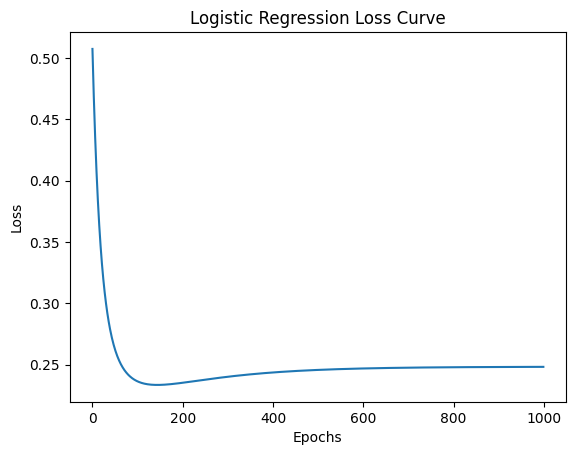

In [30]:
from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
scaler_log = StandardScalerManual()
X_class_scaled = scaler_log.fit_transform(X_class)
log_model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
log_model.fit(X_class_scaled, y_class)
preds = log_model.predict(X_class_scaled)
accuracy = np.mean(preds == y_class)
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")
plt.plot(log_model.loss_history)
plt.title("Logistic Regression Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [31]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n, m = M.shape
    flat_M = M.reshape(-1, 1)
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(flat_M)
    labels_flat = kmeans.labels_
    assignment_table = labels_flat.reshape(n, m)
    centroids = kmeans.cluster_centers_.flatten()
    cookbook = {i:[] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cookbook[assignment_table[i, j]].append((i, j))
    return assignment_table, cookbook, centroids



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
